In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import math

%matplotlib inline
plt.rc("savefig", dpi=250)
import ipywidgets as widgets

## Google

In [14]:
MAX_DISTANCE_g=326

# read and transform the distance file
# iphone, galaxy, htc, lg, pixel
distances_g=[]
with open('/Users/Di/Documents/2018Spring/mkt/analytics2/monthly_google_trends.csv', 'r') as f:
    next(f)
    for line in f:
        e=line.strip().split(',')
        m=np.matrix([map(int,[MAX_DISTANCE_g,e[1],e[2],e[3],e[4]]),
                     map(int,[e[1],MAX_DISTANCE_g,e[5],e[6],e[7]]),
                     map(int,[e[2],e[5],MAX_DISTANCE_g,e[8],e[9]]),
                     map(int,[e[3],e[6],e[8],MAX_DISTANCE_g,e[10]]),
                     map(int,[e[4],e[7],e[9],e[10],MAX_DISTANCE_g])])
        m=MAX_DISTANCE_g-m
        d=np.asarray(m)
        distances_g.append(d)

iphone_g, galaxy_g, htc_g, lg_g, pixel_g = [],[],[],[],[]

for i in range(len(distances_g)):
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=4,
                   dissimilarity="precomputed", n_jobs=1)
    pos=mds.fit(distances_g[i]).embedding_
    iphone_g.append(pos[0])
    galaxy_g.append(pos[1])
    htc_g.append(pos[2])
    lg_g.append(pos[3])
    pixel_g.append(pos[4])

In [7]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    degree = phi*180/math.pi
    return(rho, degree)
def pol2cart(rho, degree):
    phi = degree*math.pi/180
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [32]:
print cart2pol(1,1)
print pol2cart(1.414213, 45)

(1.4142135623730951, 45.0)
(0.999999602342171, 0.99999960234217078)


In [15]:
full_coor = zip(iphone_g,galaxy_g,htc_g,lg_g,pixel_g)

In [16]:
iphone_g, galaxy_g, htc_g, lg_g, pixel_g = [],[],[],[],[]
for i,g,h,l,p in full_coor:
    x=i[0],
    y=i[1],
    g_x=g[0]-x
    g_y=g[1]-y
    h_x=h[0]-x
    h_y=h[1]-y
    l_x=l[0]-x
    l_y=l[1]-y
    p_x=p[0]-x
    p_y=p[1]-y
    theta=cart2pol(p_x,p_y)[1]
    gn=pol2cart(cart2pol(g_x,g_y)[0],(cart2pol(g_x,g_y)[1]-theta))
    hn=pol2cart(cart2pol(h_x,h_y)[0],(cart2pol(h_x,h_y)[1]-theta))
    ln=pol2cart(cart2pol(l_x,l_y)[0],(cart2pol(l_x,l_y)[1]-theta))
    pn=pol2cart(cart2pol(p_x,p_y)[0],(cart2pol(p_x,p_y)[1]-theta))
    iphone_g.append((0,0))
    galaxy_g.append(gn)
    htc_g.append(hn)
    lg_g.append(ln)
    pixel_g.append(pn)

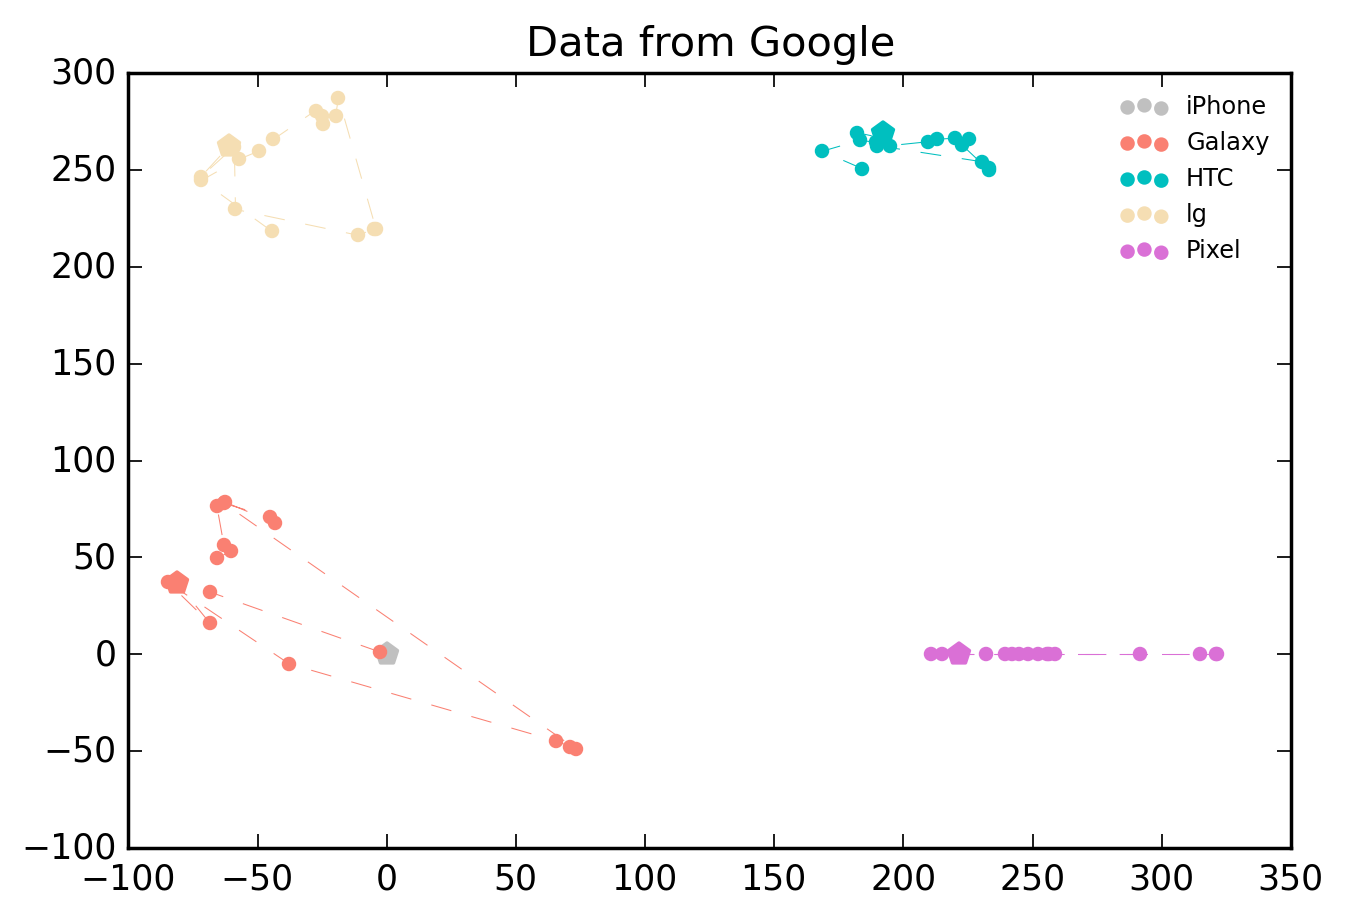

In [17]:
def stepwise_fig_g(y):
    plt.figure()
    plt.plot([x[0] for x in iphone_g[:y]],[x[1] for x in iphone_g[:y]], lw=0.3, color='silver', ls='dashed')
    plt.scatter([x[0] for x in iphone_g[:y]],[x[1] for x in iphone_g[:y]], s=10,color='silver',label="iPhone")
    plt.scatter(iphone_g[y-1][0],iphone_g[y-1][1],s=40,color='silver',marker='p')
    plt.plot([x[0] for x in galaxy_g[:y]],[x[1] for x in galaxy_g[:y]], lw=0.3,color='salmon', ls='dashed')
    plt.scatter([x[0] for x in galaxy_g[:y]],[x[1] for x in galaxy_g[:y]], s=10,color='salmon',label="Galaxy")
    plt.scatter(galaxy_g[y-1][0],galaxy_g[y-1][1],s=40,color='salmon',marker='p')
    plt.plot([x[0] for x in htc_g[:y]],[x[1] for x in htc_g[:y]], lw=0.3,color='c', ls='dashed')
    plt.scatter([x[0] for x in htc_g[:y]],[x[1] for x in htc_g[:y]], s=10,color='c',label="HTC")
    plt.scatter(htc_g[y-1][0],htc_g[y-1][1],s=40,color='c',marker='p')
    plt.plot([x[0] for x in lg_g[:y]],[x[1] for x in lg_g[:y]], lw=0.3, color='wheat', ls='dashed')
    plt.scatter([x[0] for x in lg_g[:y]],[x[1] for x in lg_g[:y]], s=10,color='wheat',label="lg")
    plt.scatter(lg_g[y-1][0],lg_g[y-1][1],s=40,color='wheat',marker='p')
    plt.plot([x[0] for x in pixel_g[:y]],[x[1] for x in pixel_g[:y]], lw=0.3,color='orchid', ls='dashed')
    plt.scatter([x[0] for x in pixel_g[:y]],[x[1] for x in pixel_g[:y]], s=10,color='orchid',label="Pixel")
    plt.scatter(pixel_g[y-1][0],pixel_g[y-1][1],s=40,color='orchid',marker='p')   
    plt.xlim(-100,350)
    plt.ylim(-100,300)
    plt.legend(frameon=False,fontsize='x-small')
    plt.title('Data from Google')
    
widgets.interact(stepwise_fig_g,y=(1,17,1))

## YouTube

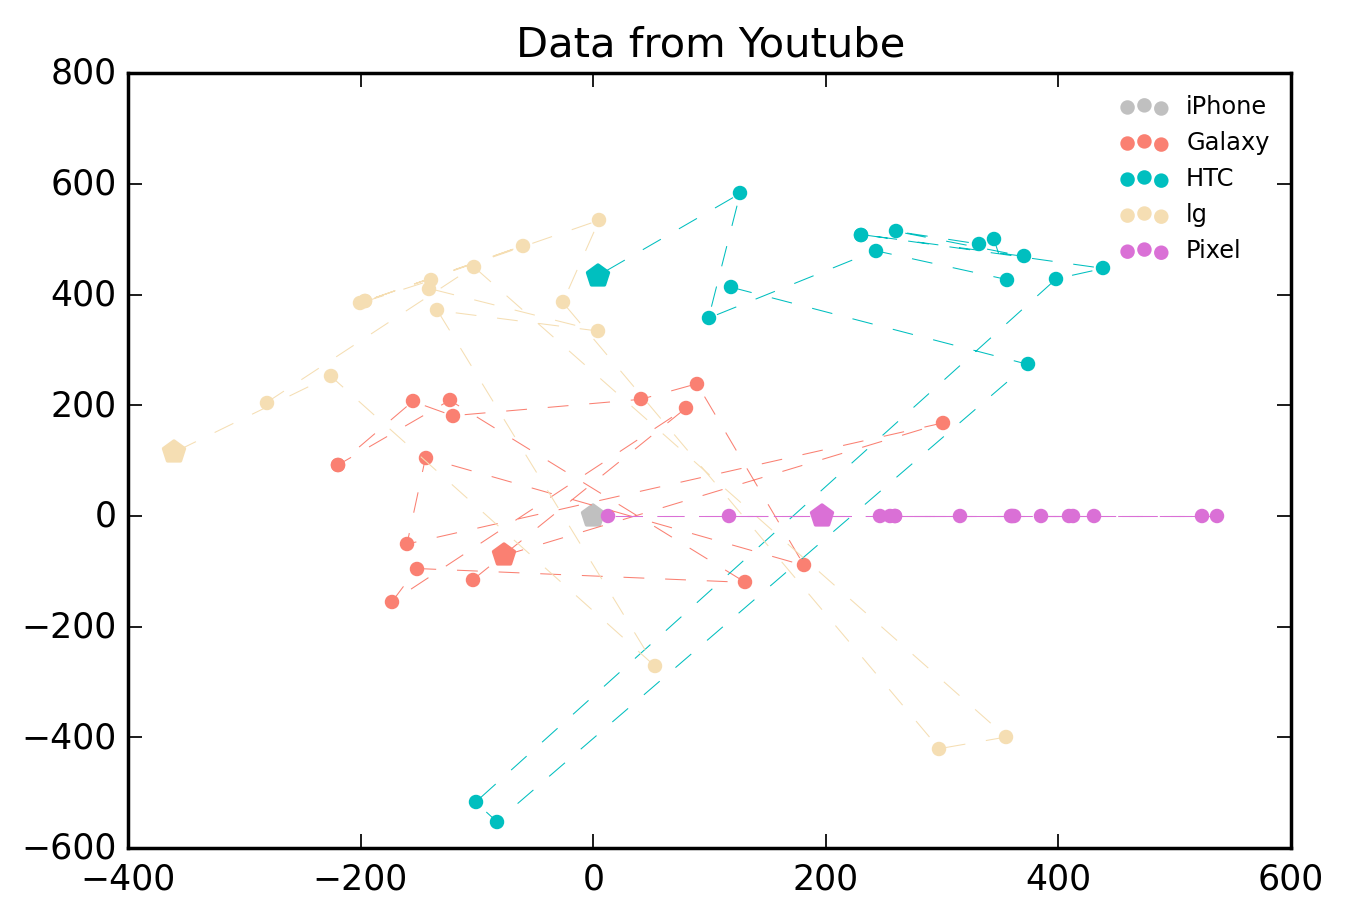

In [20]:
MAX_DISTANCE=573

# read and transform the distance file
# iphone, galaxy, htc, lg, pixel
distances_g=[]
with open('/Users/Di/Documents/2018Spring/mkt/analytics2/monthly_youtube.csv', 'r') as f:
    next(f)
    for line in f:
        e=line.strip().split(',')
        m=np.matrix([map(int,[MAX_DISTANCE,e[1],e[2],e[3],e[4]]),
                     map(int,[e[1],MAX_DISTANCE,e[5],e[6],e[7]]),
                     map(int,[e[2],e[5],MAX_DISTANCE,e[8],e[9]]),
                     map(int,[e[3],e[6],e[8],MAX_DISTANCE,e[10]]),
                     map(int,[e[4],e[7],e[9],e[10],MAX_DISTANCE])])
        m=MAX_DISTANCE-m
        d=np.asarray(m)
        distances_g.append(d)

iphone_g, galaxy_g, htc_g, lg_g, pixel_g = [],[],[],[],[]

for i in range(len(distances_g)):
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=4,
                   dissimilarity="precomputed", n_jobs=1)
    pos=mds.fit(distances_g[i]).embedding_
    iphone_g.append(pos[0])
    galaxy_g.append(pos[1])
    htc_g.append(pos[2])
    lg_g.append(pos[3])
    pixel_g.append(pos[4])
    
full_coor = zip(iphone_g,galaxy_g,htc_g,lg_g,pixel_g)
iphone_g, galaxy_g, htc_g, lg_g, pixel_g = [],[],[],[],[]
for i,g,h,l,p in full_coor:
    x=i[0],
    y=i[1],
    g_x=g[0]-x
    g_y=g[1]-y
    h_x=h[0]-x
    h_y=h[1]-y
    l_x=l[0]-x
    l_y=l[1]-y
    p_x=p[0]-x
    p_y=p[1]-y
    theta=cart2pol(p_x,p_y)[1]
    gn=pol2cart(cart2pol(g_x,g_y)[0],(cart2pol(g_x,g_y)[1]-theta))
    hn=pol2cart(cart2pol(h_x,h_y)[0],(cart2pol(h_x,h_y)[1]-theta))
    ln=pol2cart(cart2pol(l_x,l_y)[0],(cart2pol(l_x,l_y)[1]-theta))
    pn=pol2cart(cart2pol(p_x,p_y)[0],(cart2pol(p_x,p_y)[1]-theta))
    iphone_g.append((0,0))
    galaxy_g.append(gn)
    htc_g.append(hn)
    lg_g.append(ln)
    pixel_g.append(pn)
def stepwise_fig_g(y):
    plt.figure()
    plt.plot([x[0] for x in iphone_g[:y]],[x[1] for x in iphone_g[:y]], lw=0.3, color='silver', ls='dashed')
    plt.scatter([x[0] for x in iphone_g[:y]],[x[1] for x in iphone_g[:y]], s=10,color='silver',label="iPhone")
    plt.scatter(iphone_g[y-1][0],iphone_g[y-1][1],s=40,color='silver',marker='p')
    plt.plot([x[0] for x in galaxy_g[:y]],[x[1] for x in galaxy_g[:y]], lw=0.3,color='salmon', ls='dashed')
    plt.scatter([x[0] for x in galaxy_g[:y]],[x[1] for x in galaxy_g[:y]], s=10,color='salmon',label="Galaxy")
    plt.scatter(galaxy_g[y-1][0],galaxy_g[y-1][1],s=40,color='salmon',marker='p')
    plt.plot([x[0] for x in htc_g[:y]],[x[1] for x in htc_g[:y]], lw=0.3,color='c', ls='dashed')
    plt.scatter([x[0] for x in htc_g[:y]],[x[1] for x in htc_g[:y]], s=10,color='c',label="HTC")
    plt.scatter(htc_g[y-1][0],htc_g[y-1][1],s=40,color='c',marker='p')
    plt.plot([x[0] for x in lg_g[:y]],[x[1] for x in lg_g[:y]], lw=0.3, color='wheat', ls='dashed')
    plt.scatter([x[0] for x in lg_g[:y]],[x[1] for x in lg_g[:y]], s=10,color='wheat',label="lg")
    plt.scatter(lg_g[y-1][0],lg_g[y-1][1],s=40,color='wheat',marker='p')
    plt.plot([x[0] for x in pixel_g[:y]],[x[1] for x in pixel_g[:y]], lw=0.3,color='orchid', ls='dashed')
    plt.scatter([x[0] for x in pixel_g[:y]],[x[1] for x in pixel_g[:y]], s=10,color='orchid',label="Pixel")
    plt.scatter(pixel_g[y-1][0],pixel_g[y-1][1],s=40,color='orchid',marker='p')   
    plt.xlim(-400,600)
    plt.ylim(-600,800)
    plt.legend(frameon=False,fontsize='x-small')
    plt.title('Data from Youtube')
    
widgets.interact(stepwise_fig_g,y=(1,17,1))

## Reddit

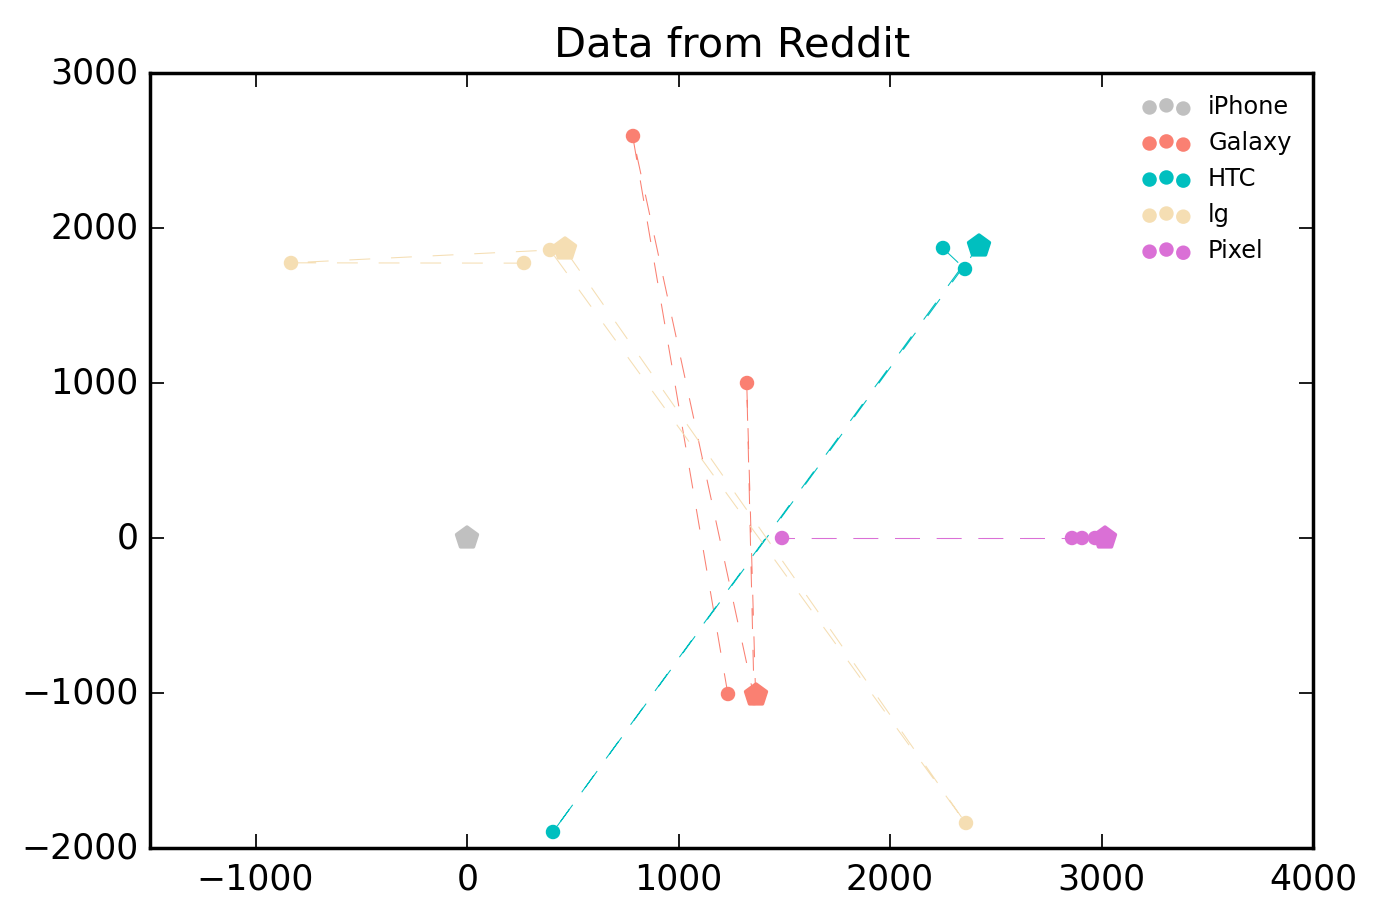

In [21]:
# read and transform the distance file
# iphone, galaxy, htc, lg, pixel
MAX_DISTANCE=2691

# read and transform the distance file
# iphone, galaxy, htc, lg, pixel
distances_g=[]
with open('/Users/Di/Documents/2018Spring/mkt/analytics2/monthly_youtube.csv', 'r') as f:
    next(f)
    for line in f:
        e=line.strip().split(',')
        m=np.matrix([map(int,[MAX_DISTANCE,e[1],e[2],e[3],e[4]]),
                     map(int,[e[1],MAX_DISTANCE,e[5],e[6],e[7]]),
                     map(int,[e[2],e[5],MAX_DISTANCE,e[8],e[9]]),
                     map(int,[e[3],e[6],e[8],MAX_DISTANCE,e[10]]),
                     map(int,[e[4],e[7],e[9],e[10],MAX_DISTANCE])])
        m=MAX_DISTANCE-m
        d=np.asarray(m)
        distances_g.append(d)

iphone_g, galaxy_g, htc_g, lg_g, pixel_g = [],[],[],[],[]

for i in range(len(distances_g)):
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=4,
                   dissimilarity="precomputed", n_jobs=1)
    pos=mds.fit(distances_g[i]).embedding_
    iphone_g.append(pos[0])
    galaxy_g.append(pos[1])
    htc_g.append(pos[2])
    lg_g.append(pos[3])
    pixel_g.append(pos[4])
    
full_coor = zip(iphone_g,galaxy_g,htc_g,lg_g,pixel_g)
iphone_g, galaxy_g, htc_g, lg_g, pixel_g = [],[],[],[],[]
for i,g,h,l,p in full_coor:
    x=i[0],
    y=i[1],
    g_x=g[0]-x
    g_y=g[1]-y
    h_x=h[0]-x
    h_y=h[1]-y
    l_x=l[0]-x
    l_y=l[1]-y
    p_x=p[0]-x
    p_y=p[1]-y
    theta=cart2pol(p_x,p_y)[1]
    gn=pol2cart(cart2pol(g_x,g_y)[0],(cart2pol(g_x,g_y)[1]-theta))
    hn=pol2cart(cart2pol(h_x,h_y)[0],(cart2pol(h_x,h_y)[1]-theta))
    ln=pol2cart(cart2pol(l_x,l_y)[0],(cart2pol(l_x,l_y)[1]-theta))
    pn=pol2cart(cart2pol(p_x,p_y)[0],(cart2pol(p_x,p_y)[1]-theta))
    iphone_g.append((0,0))
    galaxy_g.append(gn)
    htc_g.append(hn)
    lg_g.append(ln)
    pixel_g.append(pn)
def stepwise_fig_g(y):
    plt.figure()
    plt.plot([x[0] for x in iphone_g[:y]],[x[1] for x in iphone_g[:y]], lw=0.3, color='silver', ls='dashed')
    plt.scatter([x[0] for x in iphone_g[:y]],[x[1] for x in iphone_g[:y]], s=10,color='silver',label="iPhone")
    plt.scatter(iphone_g[y-1][0],iphone_g[y-1][1],s=40,color='silver',marker='p')
    plt.plot([x[0] for x in galaxy_g[:y]],[x[1] for x in galaxy_g[:y]], lw=0.3,color='salmon', ls='dashed')
    plt.scatter([x[0] for x in galaxy_g[:y]],[x[1] for x in galaxy_g[:y]], s=10,color='salmon',label="Galaxy")
    plt.scatter(galaxy_g[y-1][0],galaxy_g[y-1][1],s=40,color='salmon',marker='p')
    plt.plot([x[0] for x in htc_g[:y]],[x[1] for x in htc_g[:y]], lw=0.3,color='c', ls='dashed')
    plt.scatter([x[0] for x in htc_g[:y]],[x[1] for x in htc_g[:y]], s=10,color='c',label="HTC")
    plt.scatter(htc_g[y-1][0],htc_g[y-1][1],s=40,color='c',marker='p')
    plt.plot([x[0] for x in lg_g[:y]],[x[1] for x in lg_g[:y]], lw=0.3, color='wheat', ls='dashed')
    plt.scatter([x[0] for x in lg_g[:y]],[x[1] for x in lg_g[:y]], s=10,color='wheat',label="lg")
    plt.scatter(lg_g[y-1][0],lg_g[y-1][1],s=40,color='wheat',marker='p')
    plt.plot([x[0] for x in pixel_g[:y]],[x[1] for x in pixel_g[:y]], lw=0.3,color='orchid', ls='dashed')
    plt.scatter([x[0] for x in pixel_g[:y]],[x[1] for x in pixel_g[:y]], s=10,color='orchid',label="Pixel")
    plt.scatter(pixel_g[y-1][0],pixel_g[y-1][1],s=40,color='orchid',marker='p')   
    plt.xlim(-1500,4000)
    plt.ylim(-2000,3000)
    plt.legend(frameon=False,fontsize='x-small')
    plt.title('Data from Reddit')
    
widgets.interact(stepwise_fig_g,y=(1,17,1))